<a href="https://colab.research.google.com/github/vinee-sha/Social-Distancing-Tracker/blob/main/TrainHuman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
!unzip "/content/drive/MyDrive/Dataset.zip" -d "/content"

Archive:  /content/drive/MyDrive/Dataset.zip
   creating: /content/Dataset/Train/
   creating: /content/Dataset/Train/Human/
  inflating: /content/Dataset/Train/Human/human01-00.png  
  inflating: /content/Dataset/Train/Human/human01-01.png  
  inflating: /content/Dataset/Train/Human/human01-02.png  
  inflating: /content/Dataset/Train/Human/human01-03.png  
  inflating: /content/Dataset/Train/Human/human01-04.png  
  inflating: /content/Dataset/Train/Human/human01-05.png  
  inflating: /content/Dataset/Train/Human/human01-06.png  
  inflating: /content/Dataset/Train/Human/human01-07.png  
  inflating: /content/Dataset/Train/Human/human01-08.png  
  inflating: /content/Dataset/Train/Human/human01-09.png  
  inflating: /content/Dataset/Train/Human/human01-10.png  
  inflating: /content/Dataset/Train/Human/human01-11.png  
  inflating: /content/Dataset/Train/Human/human01-12.png  
  inflating: /content/Dataset/Train/Human/human01-13.png  
  inflating: /content/Dataset/Train/Human/human01

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
train_dir = "/content/Dataset/Train"
validation_dir = "/content/Dataset/Validation"

In [30]:
train_humans_dir = os.path.join(train_dir, 'Human')
validation_humans_dir = os.path.join(validation_dir, 'Human')
train_nohumans_dir = os.path.join(train_dir, 'NoHuman')
validation_nohumans_dir = os.path.join(validation_dir, 'NoHuman')

In [31]:
total_train = len(os.listdir(train_humans_dir)) + len(os.listdir(train_nohumans_dir))
total_val = len(os.listdir(validation_humans_dir)) + len(os.listdir(validation_nohumans_dir))
print(total_train, total_val)

1065 314


In [32]:
# Model Parameters
BATCH_SIZE = 120
IMG_SHAPE = 150
EPOCHS = 100

MODEL CREATION

In [33]:
# Initialize the CNN
classifier = Sequential()

In [34]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(IMG_SHAPE, IMG_SHAPE, 3), activation='relu'))

In [35]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(2, 2))

In [36]:
# Step 1 & 2 with more hidden layers
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(2, 2))

classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(2, 2))

classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(2, 2))

In [37]:
# Step 3 - Dropout
classifier.add(Dropout(0.5))

In [38]:
# Step 4 - Flattening
classifier.add(Flatten())

In [39]:
# Step 5 - Full connection
classifier.add(Dense(units=512, activation='relu'))

In [40]:
# Step 6 - Output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [41]:
# Compiling the CNN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

Data Augmentation and Preparation

In [43]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
) 

In [44]:
training_set = train_datagen.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    class_mode='binary'
)

Found 1065 images belonging to 2 classes.


In [45]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [46]:
validation_set = validation_datagen.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=validation_dir,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    class_mode='binary'
)

Found 314 images belonging to 2 classes.


In [47]:
history = classifier.fit_generator(
    training_set,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=validation_set,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
9/9 [==============================] - 49s 2s/step - loss: 0.7094 - accuracy: 0.4939 - val_loss: 0.6750 - val_accuracy: 0.9172
Epoch 2/100
9/9 [==============================] - 17s 2s/step - loss: 0.6382 - accuracy: 0.6901 - val_loss: 0.4785 - val_accuracy: 0.6879
Epoch 3/100
9/9 [==============================] - 17s 2s/step - loss: 0.5071 - accuracy: 0.7343 - val_loss: 0.1988 - val_accuracy: 0.9236
Epoch 4/100
9/9 [==============================] - 17s 2s/step - loss: 0.3307 - accuracy: 0.8648 - val_loss: 0.0842 - val_accuracy: 0.9618
Epoch 5/100
9/9 [==============================] - 17s 2s/step - loss: 0.2560 - accuracy: 0.8901 - val_loss: 0.0180 - val_accuracy: 0.9968
Epoch 6/100
9/9 [==============================] - 17s 2s/step - loss: 0.2670 - accuracy: 0.8789 - val_loss: 0.1197 - val_accuracy: 0.9427
Epoch 7/100
9/9 [==============================] - 17s 2s/step - loss: 0.1956 - accuracy: 0.9211 - val_loss: 0.1035 - val_accuracy: 0.9459
Epoch 8/100
9/9 [==========

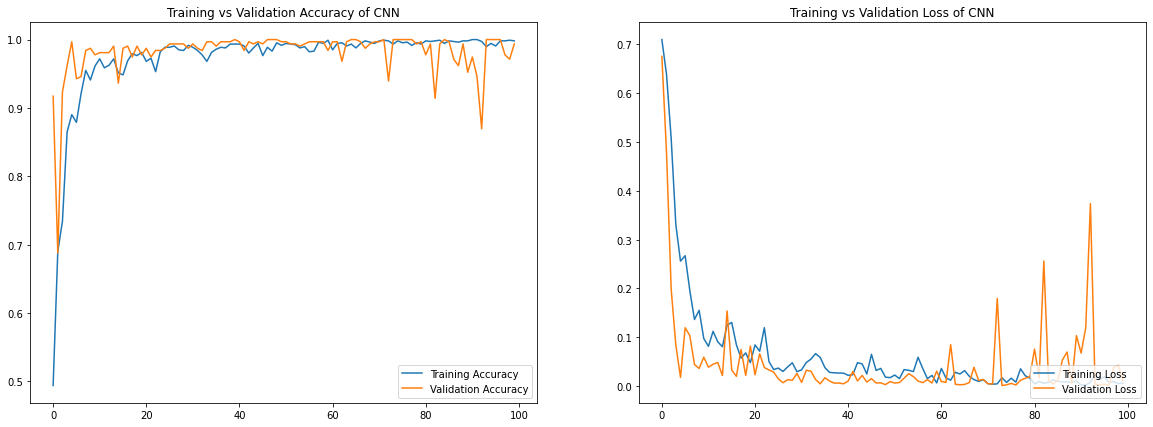

In [48]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training vs Validation Accuracy of CNN")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title("Training vs Validation Loss of CNN")

plt.show()
plt.close()

In [ ]:
max(acc)

0.9610389471054077

In [58]:
from keras import models

classifier.save("/content/drive/MyDrive/human_model.h5")